In [2]:
##Import Pandas, NumPy and Scipy libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [3]:
##load data in a dataframe

train = pd.read_csv(r'C:\Users\Deepak\ML Course\Project\train.csv', sep=',', index_col='Id') 
test = pd.read_csv(r'C:\Users\Deepak\ML Course\Project\test.csv', sep=',', index_col='Id') 



In [4]:
##Using info to understand the data quality
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

The train data size is : (1460, 80) 
The test data size is : (1459, 79) 


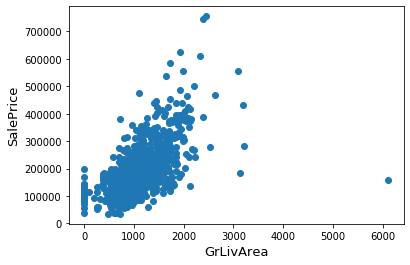

In [6]:
## Hypothisis is that Sale Price will be positively correlated to Basement Sq. footage. Plotting a scatter plot to validate the assumption

fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

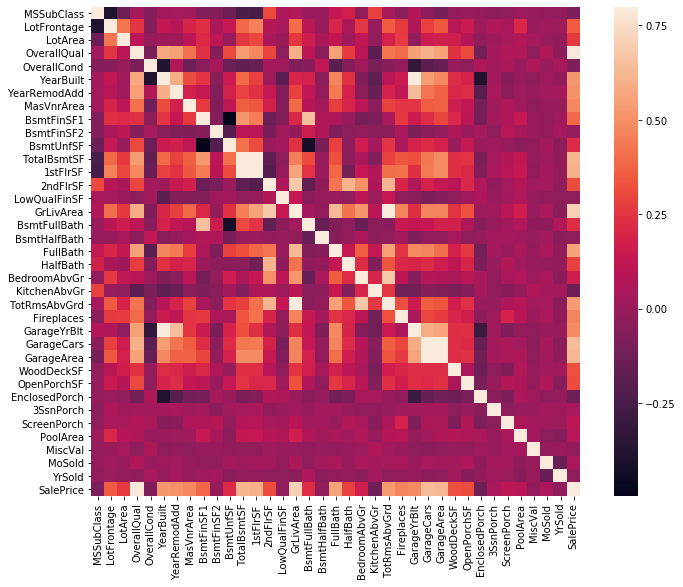

In [7]:
##Correlation matrix (heatmap style)
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

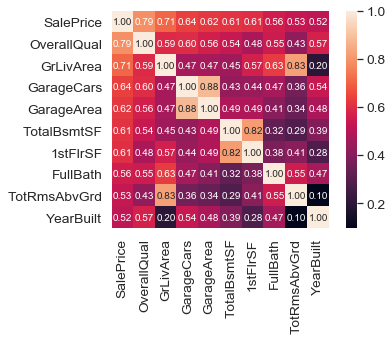

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
corrmat.sort_values('SalePrice', ascending=False)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.084,0.352,0.264,0.791,-0.078,0.523,0.507,0.477,0.386,-0.011,...,0.324,0.316,-0.129,0.045,0.111,0.092,-0.021,0.046,-0.029,1.000
OverallQual,0.033,0.252,0.106,1.000,-0.092,0.572,0.551,0.412,0.240,-0.059,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
GrLivArea,0.075,0.403,0.263,0.593,-0.080,0.199,0.287,0.391,0.208,-0.010,...,0.247,0.330,0.009,0.021,0.102,0.170,-0.002,0.050,-0.037,0.709
GarageCars,-0.040,0.286,0.155,0.601,-0.186,0.538,0.421,0.364,0.224,-0.038,...,0.226,0.214,-0.151,0.036,0.050,0.021,-0.043,0.041,-0.039,0.640
GarageArea,-0.099,0.345,0.180,0.562,-0.152,0.479,0.372,0.373,0.297,-0.018,...,0.225,0.241,-0.122,0.035,0.051,0.061,-0.027,0.028,-0.027,0.623
TotalBsmtSF,-0.239,0.392,0.261,0.538,-0.171,0.391,0.291,0.364,0.522,0.105,...,0.232,0.247,-0.095,0.037,0.084,0.126,-0.018,0.013,-0.015,0.614
1stFlrSF,-0.252,0.457,0.299,0.476,-0.144,0.282,0.240,0.345,0.446,0.097,...,0.235,0.212,-0.065,0.056,0.089,0.132,-0.021,0.031,-0.014,0.606
FullBath,0.132,0.199,0.126,0.551,-0.194,0.468,0.439,0.277,0.059,-0.076,...,0.188,0.260,-0.115,0.035,-0.008,0.050,-0.014,0.056,-0.020,0.561
TotRmsAbvGrd,0.040,0.352,0.190,0.427,-0.058,0.096,0.192,0.281,0.044,-0.035,...,0.166,0.234,0.004,-0.007,0.059,0.084,0.025,0.037,-0.035,0.534
YearBuilt,0.028,0.123,0.014,0.572,-0.376,1.000,0.593,0.316,0.250,-0.049,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523


In [10]:
corrmatbsmt = corrmat[corrmat.index.str.contains("Bsmt")].sort_values('SalePrice', ascending=False)
corrmatbsmt

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
TotalBsmtSF,-0.239,0.392,0.261,0.538,-0.171,0.391,0.291,0.364,0.522,0.105,...,0.232,0.247,-0.095,0.037,0.084,0.126,-0.018,0.013,-0.015,0.614
BsmtFinSF1,-0.070,0.234,0.214,0.240,-0.046,0.250,0.128,0.265,1.000,-0.050,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386
BsmtFullBath,0.003,0.101,0.158,0.111,-0.055,0.188,0.119,0.085,0.649,0.159,...,0.175,0.067,-0.050,-0.000,0.023,0.068,-0.023,-0.025,0.067,0.227
BsmtUnfSF,-0.141,0.133,-0.003,0.308,-0.137,0.149,0.181,0.114,-0.495,-0.209,...,-0.005,0.129,-0.003,0.021,-0.013,-0.035,-0.024,0.035,-0.041,0.214
BsmtFinSF2,-0.066,0.050,0.111,-0.059,0.040,-0.049,-0.068,-0.072,-0.050,1.000,...,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,-0.015,0.032,-0.011
BsmtHalfBath,-0.002,-0.007,0.048,-0.040,0.118,-0.038,-0.012,0.027,0.067,0.071,...,0.040,-0.025,-0.009,0.035,0.032,0.020,-0.007,0.033,-0.047,-0.017


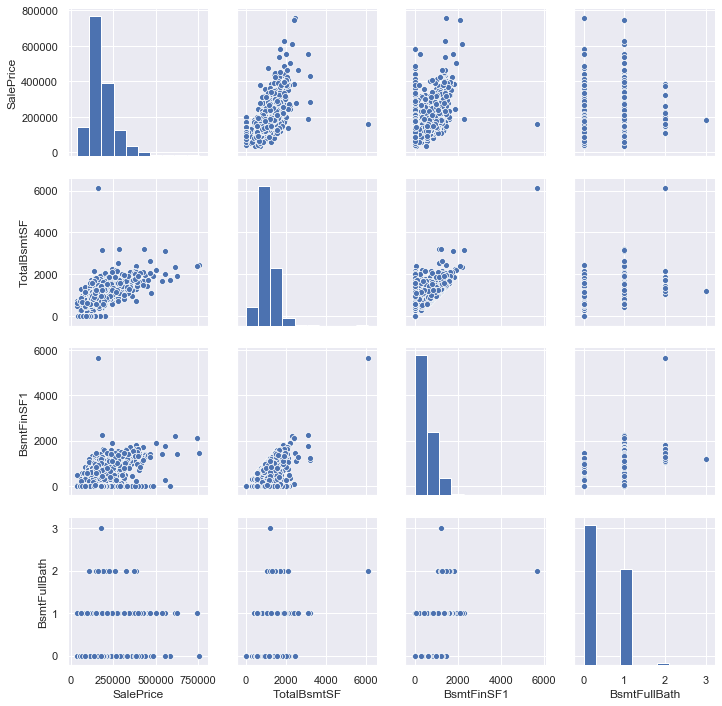

In [37]:
#scatterplot
sns.set()
cols = ['SalePrice','TotalBsmtSF', 'BsmtFinSF1', 'BsmtFullBath']
sns.pairplot(train[cols], height = 2.5)
plt.show();

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [39]:
train['TotalBsmtSF'].describe()

count   1460.000
mean    1057.429
std      438.705
min        0.000
25%      795.750
50%      991.500
75%     1298.250
max     6110.000
Name: TotalBsmtSF, dtype: float64

In [40]:
##Removing the outlier --> The Total Basement Squarefootage is very high whereas the price is significantly low. This will skew the analysis

max_bsmt = train[train['TotalBsmtSF']==6110]
max_bsmt[['Neighborhood', 'LotFrontage', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']]

,Neighborhood,LotFrontage,GrLivArea,TotalBsmtSF,SalePrice
Id,,,,,
1299,Edwards,313.000,5642,6110,160000


In [43]:
edwards = train[train['Neighborhood']=='Edwards']
edwards[['LotFrontage', 'GrLivArea', 'TotalBsmtSF', 'SalePrice', 'YrSold']].sort_values(by = ['TotalBsmtSF'])

,LotFrontage,GrLivArea,TotalBsmtSF,SalePrice,YrSold
Id,,,,,
40,65.000,1152,0,82000,2008
1180,77.000,1124,0,93000,2006
1001,74.000,944,0,82000,2009
1012,75.000,1664,0,100000,2010
363,64.000,1922,0,198500,2009
1036,nan,845,0,84000,2009
183,60.000,1340,0,120000,2007
750,50.000,1529,0,98000,2009
1046,nan,1733,0,139600,2009


In [44]:
## Dropping the house with 5642 sq feet and Sale Price significantly less as this is an outlier

train1 = train.drop(1299)

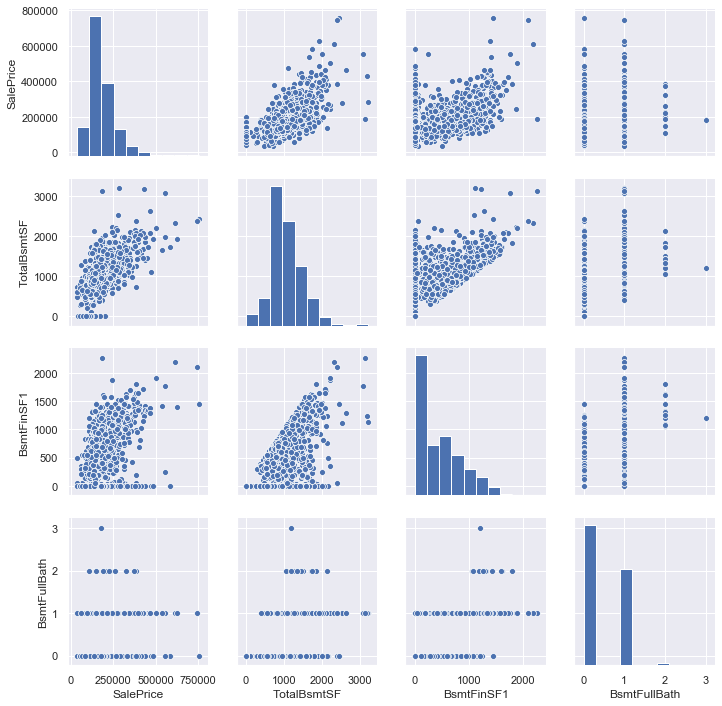

In [45]:
#scatterplot - Plotting again after removing the outlier
sns.set()
cols = ['SalePrice','TotalBsmtSF', 'BsmtFinSF1', 'BsmtFullBath']
sns.pairplot(train1[cols], height = 2.5)
plt.show();

In [ ]:
## The Correlation is much more after removing the outlier

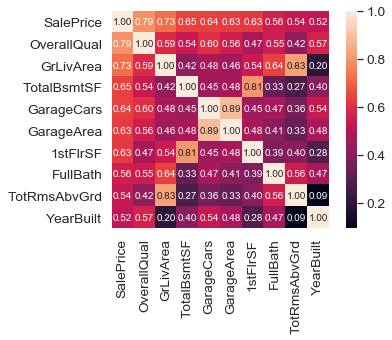

In [47]:
#saleprice correlation matrix

corrmat1 = train1.corr()

k = 10 #number of variables for heatmap
cols = corrmat1.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [48]:
## Getting only Basement features

trainbsmt = train1[['SalePrice', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
trainbsmt.head()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,
1,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
2,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
3,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
4,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
5,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [50]:
trainbsmt1 = trainbsmt.dropna(subset=['BsmtQual'])
trainbsmt1.head()

,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,
1,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
2,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
3,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
4,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
5,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


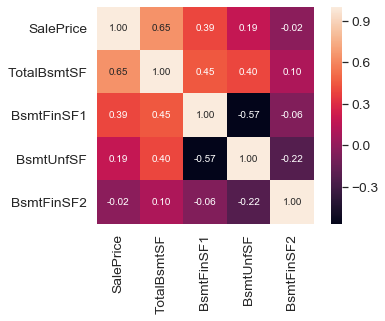

In [51]:
#Heatmap for basement features
#saleprice correlation matrix

corrmat2 = trainbsmt1.corr()

k = 5 #number of variables for heatmap
cols = corrmat2.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainbsmt1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

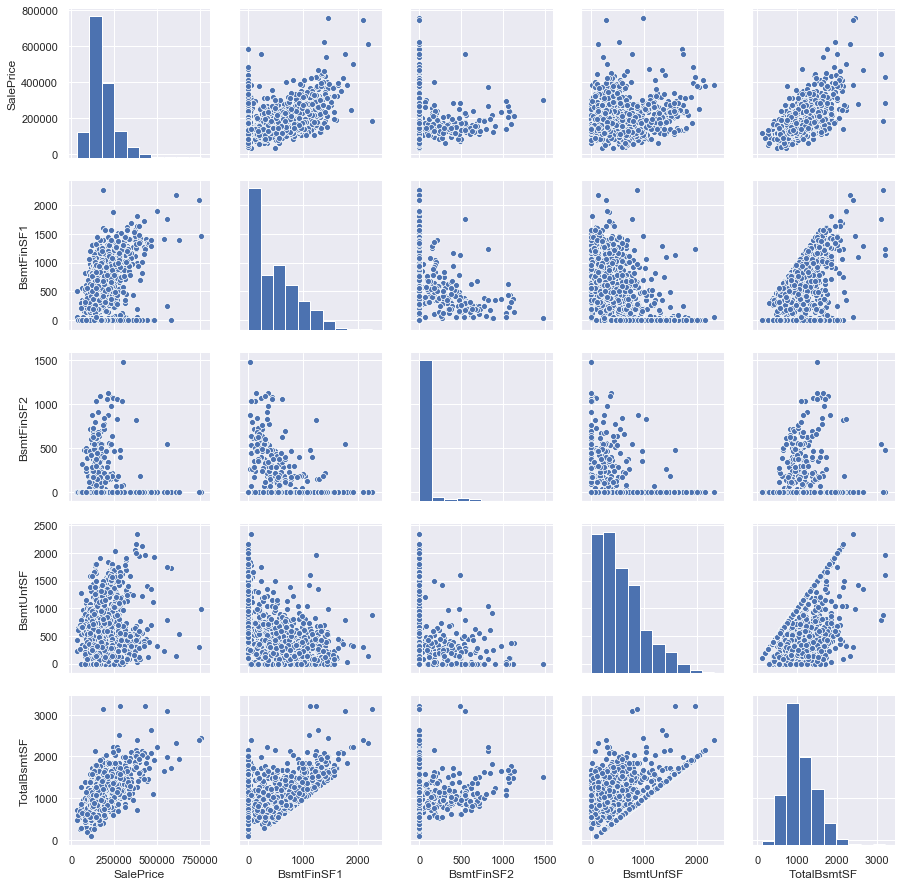

In [52]:
#scatterplot - Plotting for basement features
sns.set()
sns.pairplot(trainbsmt1, height = 2.5)
plt.show();